In [1]:
import requests
import pandas as pd

# Définir la clé API et l'URL de base
API_KEY = 'd2eac1fe84adf9c68fe31ca99a2576d4'
BASE_URL = 'https://api.elsevier.com/content/search/scopus'

# Fonction pour récupérer les données de Scopus
def get_scopus_data(query, api_key, count=10):
    headers = {
        'Accept': 'application/json',
        'X-ELS-APIKey': api_key
    }
    params = {
        'query': query,
        'count': count
    }
    response = requests.get(BASE_URL, headers=headers, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Erreur de requête: {response.status_code}")
        return None

# Exécuter une requête exemple
query = 'TITLE(python) AND SUBJAREA(comp)'
data = get_scopus_data(query, API_KEY)

# Vérifier et afficher les données récupérées
if data:
    entries = data.get('search-results', {}).get('entry', [])
    for entry in entries:
        print(f"Title: {entry.get('dc:title')}")
        print(f"Authors: {entry.get('dc:creator')}")
        print(f"Publication Date: {entry.get('prism:coverDate')}")
        print(f"Citation Count: {entry.get('citedby-count')}")
        print("-" * 40)


Title: SynGenes: a Python class for standardizing nomenclatures of mitochondrial and chloroplast genes and a web form for enhancing searches for evolutionary analyses
Authors: Rabelo L.P.
Publication Date: 2024-12-01
Citation Count: 0
----------------------------------------
Title: Noisecut: a python package for noise-tolerant classification of binary data using prior knowledge integration and max-cut solutions
Authors: Samadi M.E.
Publication Date: 2024-12-01
Citation Count: 0
----------------------------------------
Title: drexml: A command line tool and Python package for drug repurposing
Authors: Esteban-Medina M.
Publication Date: 2024-12-01
Citation Count: 0
----------------------------------------
Title: MetageneCluster: a Python package for filtering conflicting signal trends in metagene plots
Authors: Carter C.
Publication Date: 2024-12-01
Citation Count: 0
----------------------------------------
Title: Prop3D: A flexible, Python-based platform for machine learning with prote

Nombre total de citations: 1


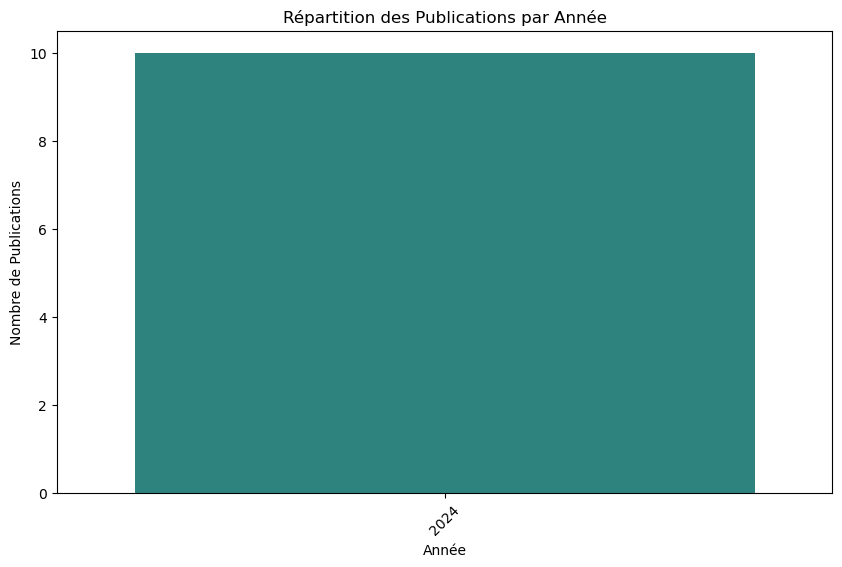

In [3]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Définir la clé API et l'URL de base
API_KEY = 'YOUR_KEY_HERE'
BASE_URL = 'https://api.elsevier.com/content/search/scopus'

# Fonction pour récupérer les données de Scopus
def get_scopus_data(query, api_key, count=10):
    headers = {
        'Accept': 'application/json',
        'X-ELS-APIKey': api_key
    }
    params = {
        'query': query,
        'count': count
    }
    response = requests.get(BASE_URL, headers=headers, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Erreur de requête: {response.status_code}")
        return None

# Exécuter une requête exemple
query = 'TITLE(python) AND SUBJAREA(comp)'
data = get_scopus_data(query, API_KEY)

# Extraction des données pertinentes
if data:
    entries = data.get('search-results', {}).get('entry', [])
    records = []
    for entry in entries:
        title = entry.get('dc:title')
        authors = entry.get('dc:creator')
        pub_date = entry.get('prism:coverDate')
        citation_count = entry.get('citedby-count', 0)
        records.append([title, authors, pub_date, citation_count])
    
    # Créer un DataFrame
    df = pd.DataFrame(records, columns=['Title', 'Authors', 'Publication Date', 'Citation Count'])
    
    # Calcul du Nombre Total de Citations
    total_citations = df['Citation Count'].astype(int).sum()
    print(f"Nombre total de citations: {total_citations}")
    
    # Analyse de la Répartition des Publications par Année
    df['Publication Year'] = pd.to_datetime(df['Publication Date']).dt.year
    publications_per_year = df['Publication Year'].value_counts().sort_index()
    
    # Visualisation de la répartition des publications par année
    plt.figure(figsize=(10, 6))
    sns.barplot(x=publications_per_year.index, y=publications_per_year.values, palette='viridis')
    plt.title('Répartition des Publications par Année')
    plt.xlabel('Année')
    plt.ylabel('Nombre de Publications')
    plt.xticks(rotation=45)
    plt.show()


In [4]:
# Identifier la publication avec le plus de citations
most_cited_publication = df.loc[df['Citation Count'].astype(int).idxmax()]
print("Publication avec le plus de citations:")
print(most_cited_publication)


Publication avec le plus de citations:
Title               Deep reinforcement learning for PID parameter ...
Authors                                                 Adesanya M.A.
Publication Date                                           2024-10-15
Citation Count                                                      1
Publication Year                                                 2024
Name: 5, dtype: object


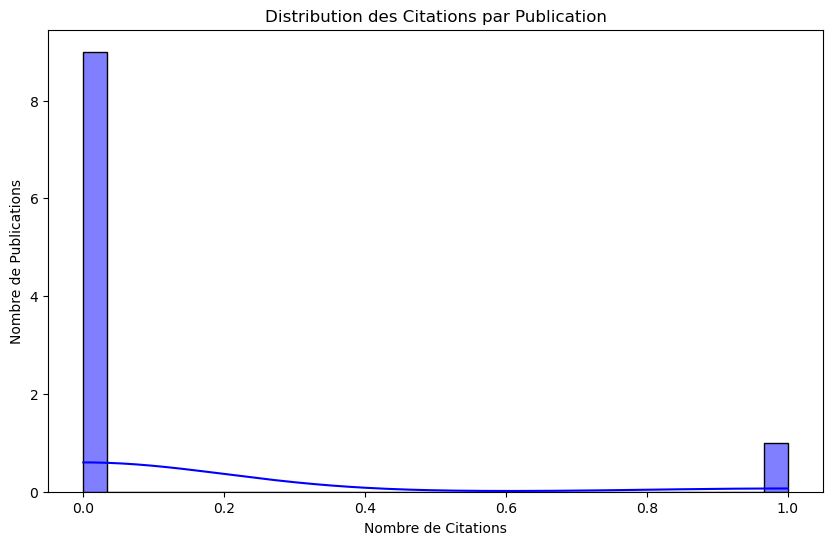

In [5]:
# Distribution des citations par publication
plt.figure(figsize=(10, 6))
sns.histplot(df['Citation Count'].astype(int), bins=30, kde=True, color='blue')
plt.title('Distribution des Citations par Publication')
plt.xlabel('Nombre de Citations')
plt.ylabel('Nombre de Publications')
plt.show()


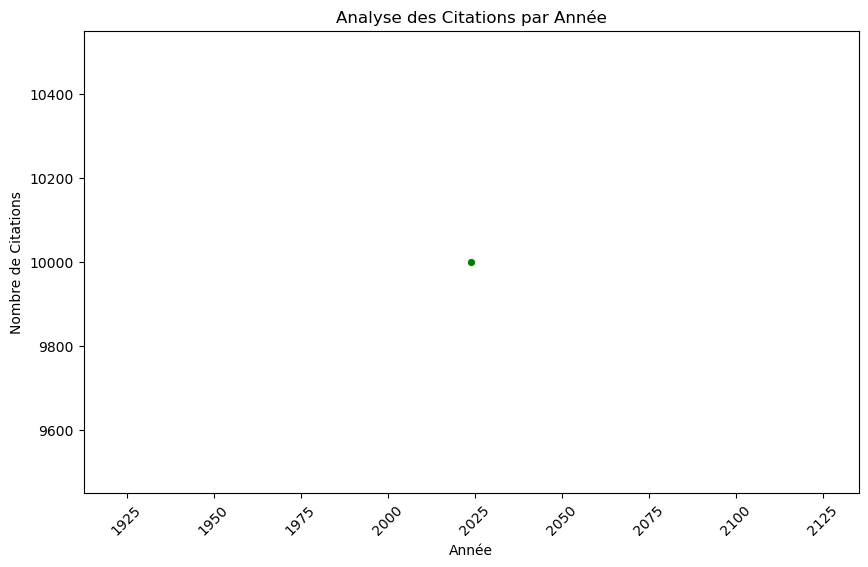

In [6]:
# Analyse des citations par année
citations_per_year = df.groupby('Publication Year')['Citation Count'].sum().astype(int)

# Visualisation des citations par année
plt.figure(figsize=(10, 6))
sns.lineplot(x=citations_per_year.index, y=citations_per_year.values, marker='o', color='green')
plt.title('Analyse des Citations par Année')
plt.xlabel('Année')
plt.ylabel('Nombre de Citations')
plt.xticks(rotation=45)
plt.show()


NameError: name 'df' is not defined

  Obtaining dependency information for rdflib from https://files.pythonhosted.org/packages/d4/b0/7b7d8b5b0d01f1a0b12cc2e5038a868ef3a15825731b8a0d776cf47566c0/rdflib-7.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for isodate<0.7.0,>=0.6.0 from https://files.pythonhosted.org/packages/b6/85/7882d311924cbcfc70b1890780763e36ff0b140c7e51c110fc59a532f087/isodate-0.6.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/531.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/531.9 kB ? eta -:--:--
    --------------------------------------- 10.2/531.9 kB ? eta -:--:--
    --------------------------------------- 10.2/531.9 kB ? eta -:--:--
   -- ------------------------------------ 30.7/531.9 kB 217.9 kB/s eta 0:00:03
   -- ------------------------------------ 30.7/531.9 kB 217.9 kB/s eta 0:00:03
   -- ------------------------------------ 30.7/531.9 kB 217.9 kB/s eta 0:00:03
   -- ------------------------------------ 30.7/531.9 kB 217